# Logistic Regression Exercise - Banking Marketing Campaign

**Business Insight**

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem**

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

## Variables

**age** - Age of customer (numeric)\
**job** - Type of job (categorical)\
**marital** - Marital status (categorical)\
**education** - Level of education (categorical)\
**default** - Do you currently have credit (categorical)\
**housing** - Do you have a housing loan (categorical)\
**loan** - Do you have a personal loan? (categorical)\
**contact** - Type of contact communication (categorical)\
**month** - Last month in which you have been contacted (categorical)\
**day_of_week** - Last day on which you have been contacted (categorical)\
**duration** - Duration of previous contact in seconds (numeric)\
**campaign** - Number of contacts made during this campaign to the customer (numeric)\
**pdays** - Number of days that elapsed since the last campaign until the customer was contacted (numeric)\
**previous** - Number of contacts made during the previous campaign to the customer (numeric)\
**poutcome** - Result of the previous marketing campaign (categorical)\
**emp.var.rate** - Employment variation rate. Quarterly indicator (numeric)\
**cons.price.idx** - Consumer price index. Monthly indicator (numeric)\
**cons.conf.idx** - Consumer confidence index. Monthly indicator (numeric)\
**euribor3m** - EURIBOR 3-month rate. Daily indicator (numeric)\
**nr.employed** - Number of employees. Quarterly indicator (numeric)\
**y** - TARGET. Whether the customer takes out a long-term deposit or not (categorical)

# Table of Contents

<a id='table_of_contents'></a>

0. [Import Libraries](#imports)
1. [Import Data](#import_data)
2. [Data Exploration](#data_exploration)
3. [Data Cleaning](#data_cleaning)
4. [Data Preparation](#data_preparation)
5. [Feature Engineering](#benchmark_model)

# 0. Import Libraries <a id='imports'></a>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

[Back to top](#table_of_contents)

# 1. Import Data <a id='import_data'></a>

In [111]:

data = pd.read_csv(
    "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";"
)
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [112]:
data.to_csv("../data/raw/data.csv", index=False)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

[Back to top](#table_of_contents)

# 2. Data Exploration <a id='data_exploration'></a>

In [114]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [115]:
data = data[
    [
        "age",
        "job",
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "month",
        "day_of_week",
        "duration",
        "campaign",
        "pdays",
        "previous",
        "poutcome",
        "cons.price.idx",
        "cons.conf.idx",
        "y",
    ]
]

In [116]:
data.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000


In [117]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

## age

<Axes: xlabel='age'>

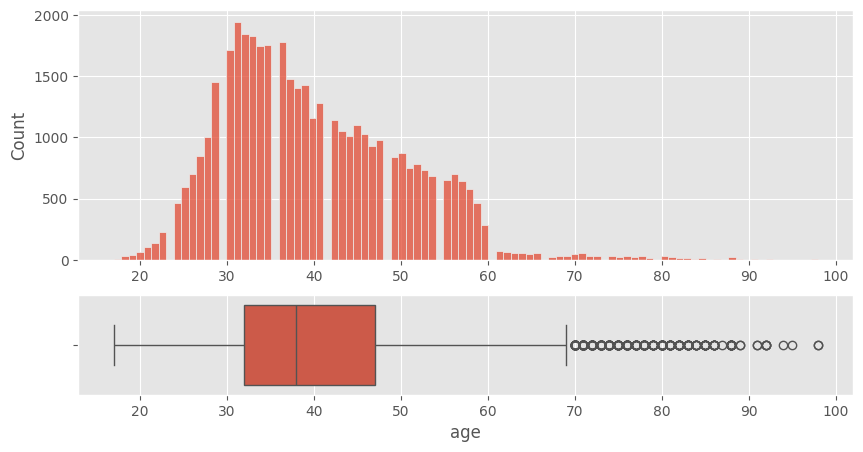

In [118]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="age", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="age", ax=axes[1])

## duration

<Axes: xlabel='duration'>

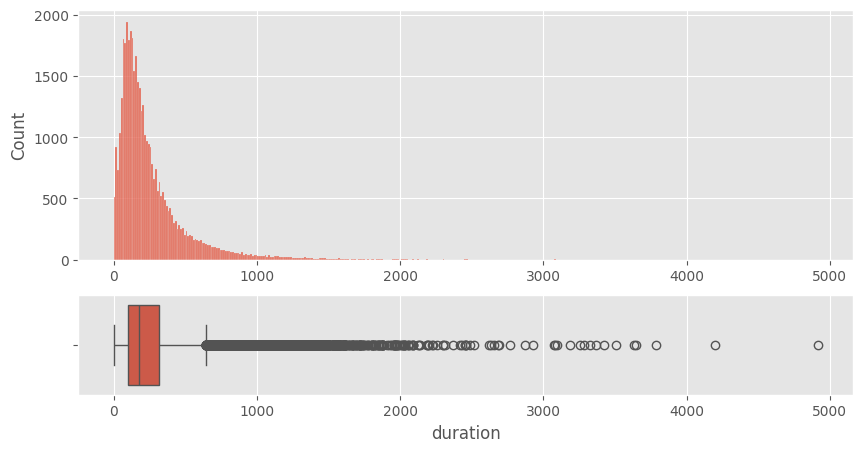

In [119]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="duration", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="duration", ax=axes[1])

In [120]:
data[data["duration"] > 4000]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
22192,52,blue-collar,married,basic.4y,no,no,no,aug,thu,4199,3,999,0,nonexistent,93.444,-36.1,yes
24091,33,technician,single,professional.course,no,yes,no,nov,mon,4918,1,999,0,nonexistent,93.200,-42.0,no


## campaign

<Axes: xlabel='campaign'>

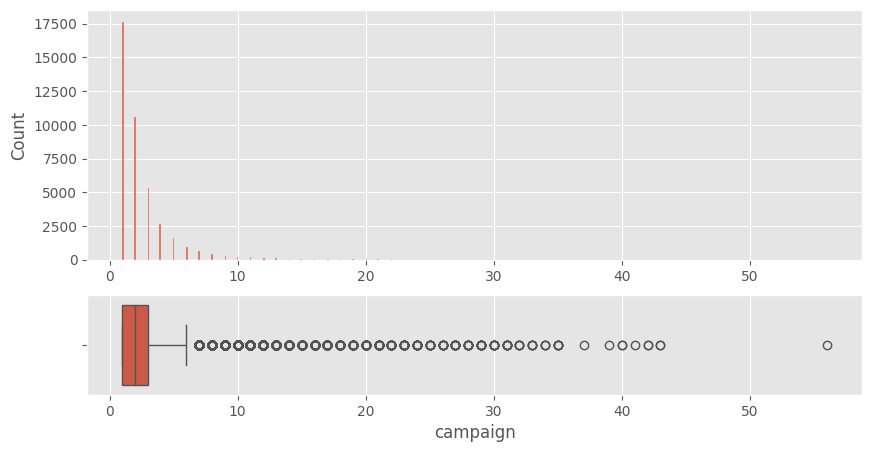

In [121]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="campaign", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="campaign", ax=axes[1])

## pdays

<Axes: xlabel='pdays'>

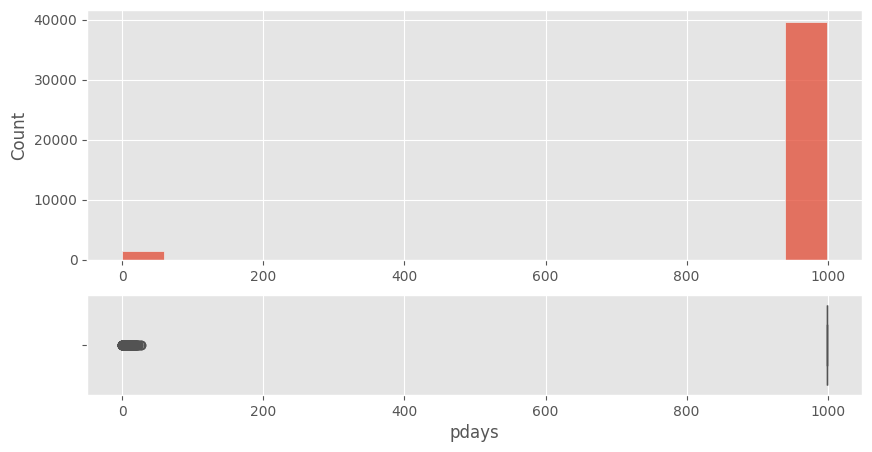

In [122]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="pdays", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="pdays", ax=axes[1])

In [123]:
data['pdays'].max()

999

In [124]:
data[data['pdays'] == 999].shape

(39673, 17)

## previous

<Axes: xlabel='previous'>

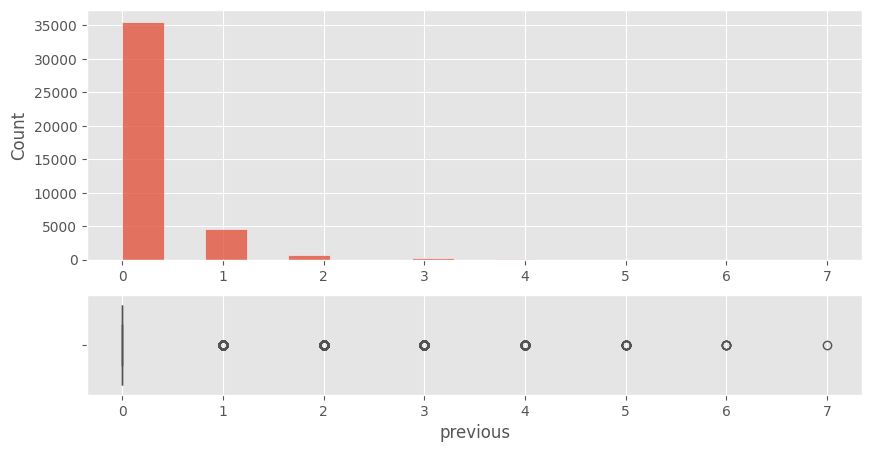

In [125]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="previous", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="previous", ax=axes[1])

In [126]:
data[data['previous'] == 0].shape

(35563, 17)

## cons.price.idx

<Axes: xlabel='cons.price.idx'>

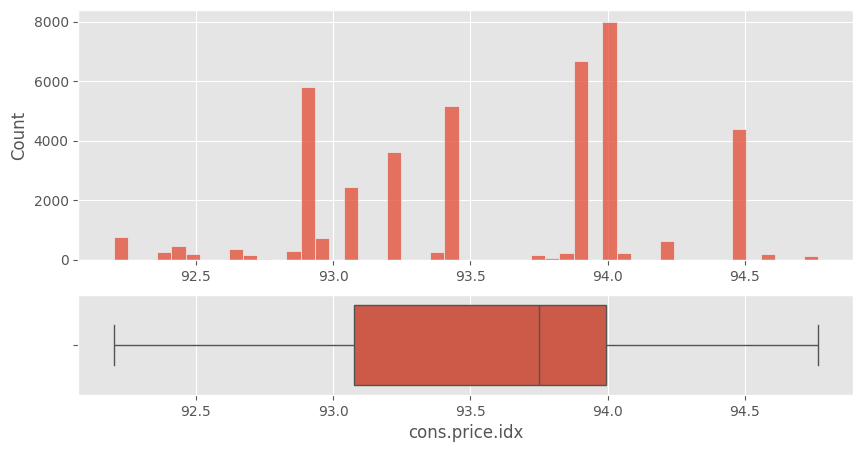

In [127]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="cons.price.idx", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="cons.price.idx", ax=axes[1])

## cons.conf.idx

<Axes: xlabel='cons.conf.idx'>

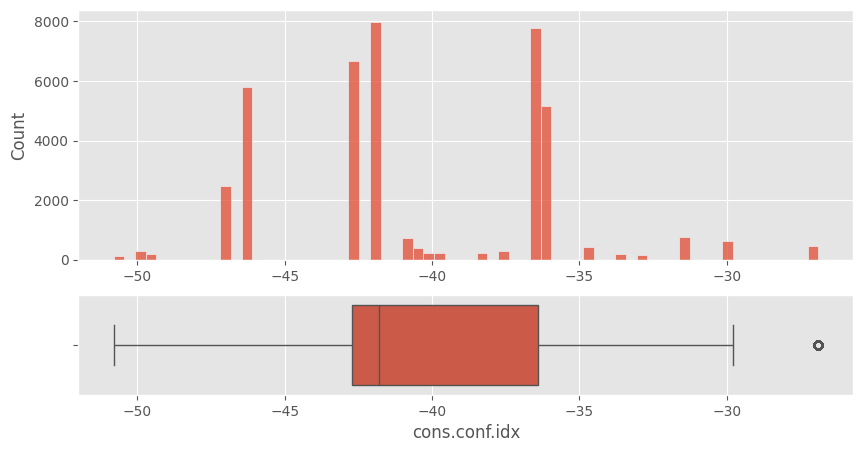

In [128]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="cons.conf.idx", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="cons.conf.idx", ax=axes[1])

## Categorical Variables

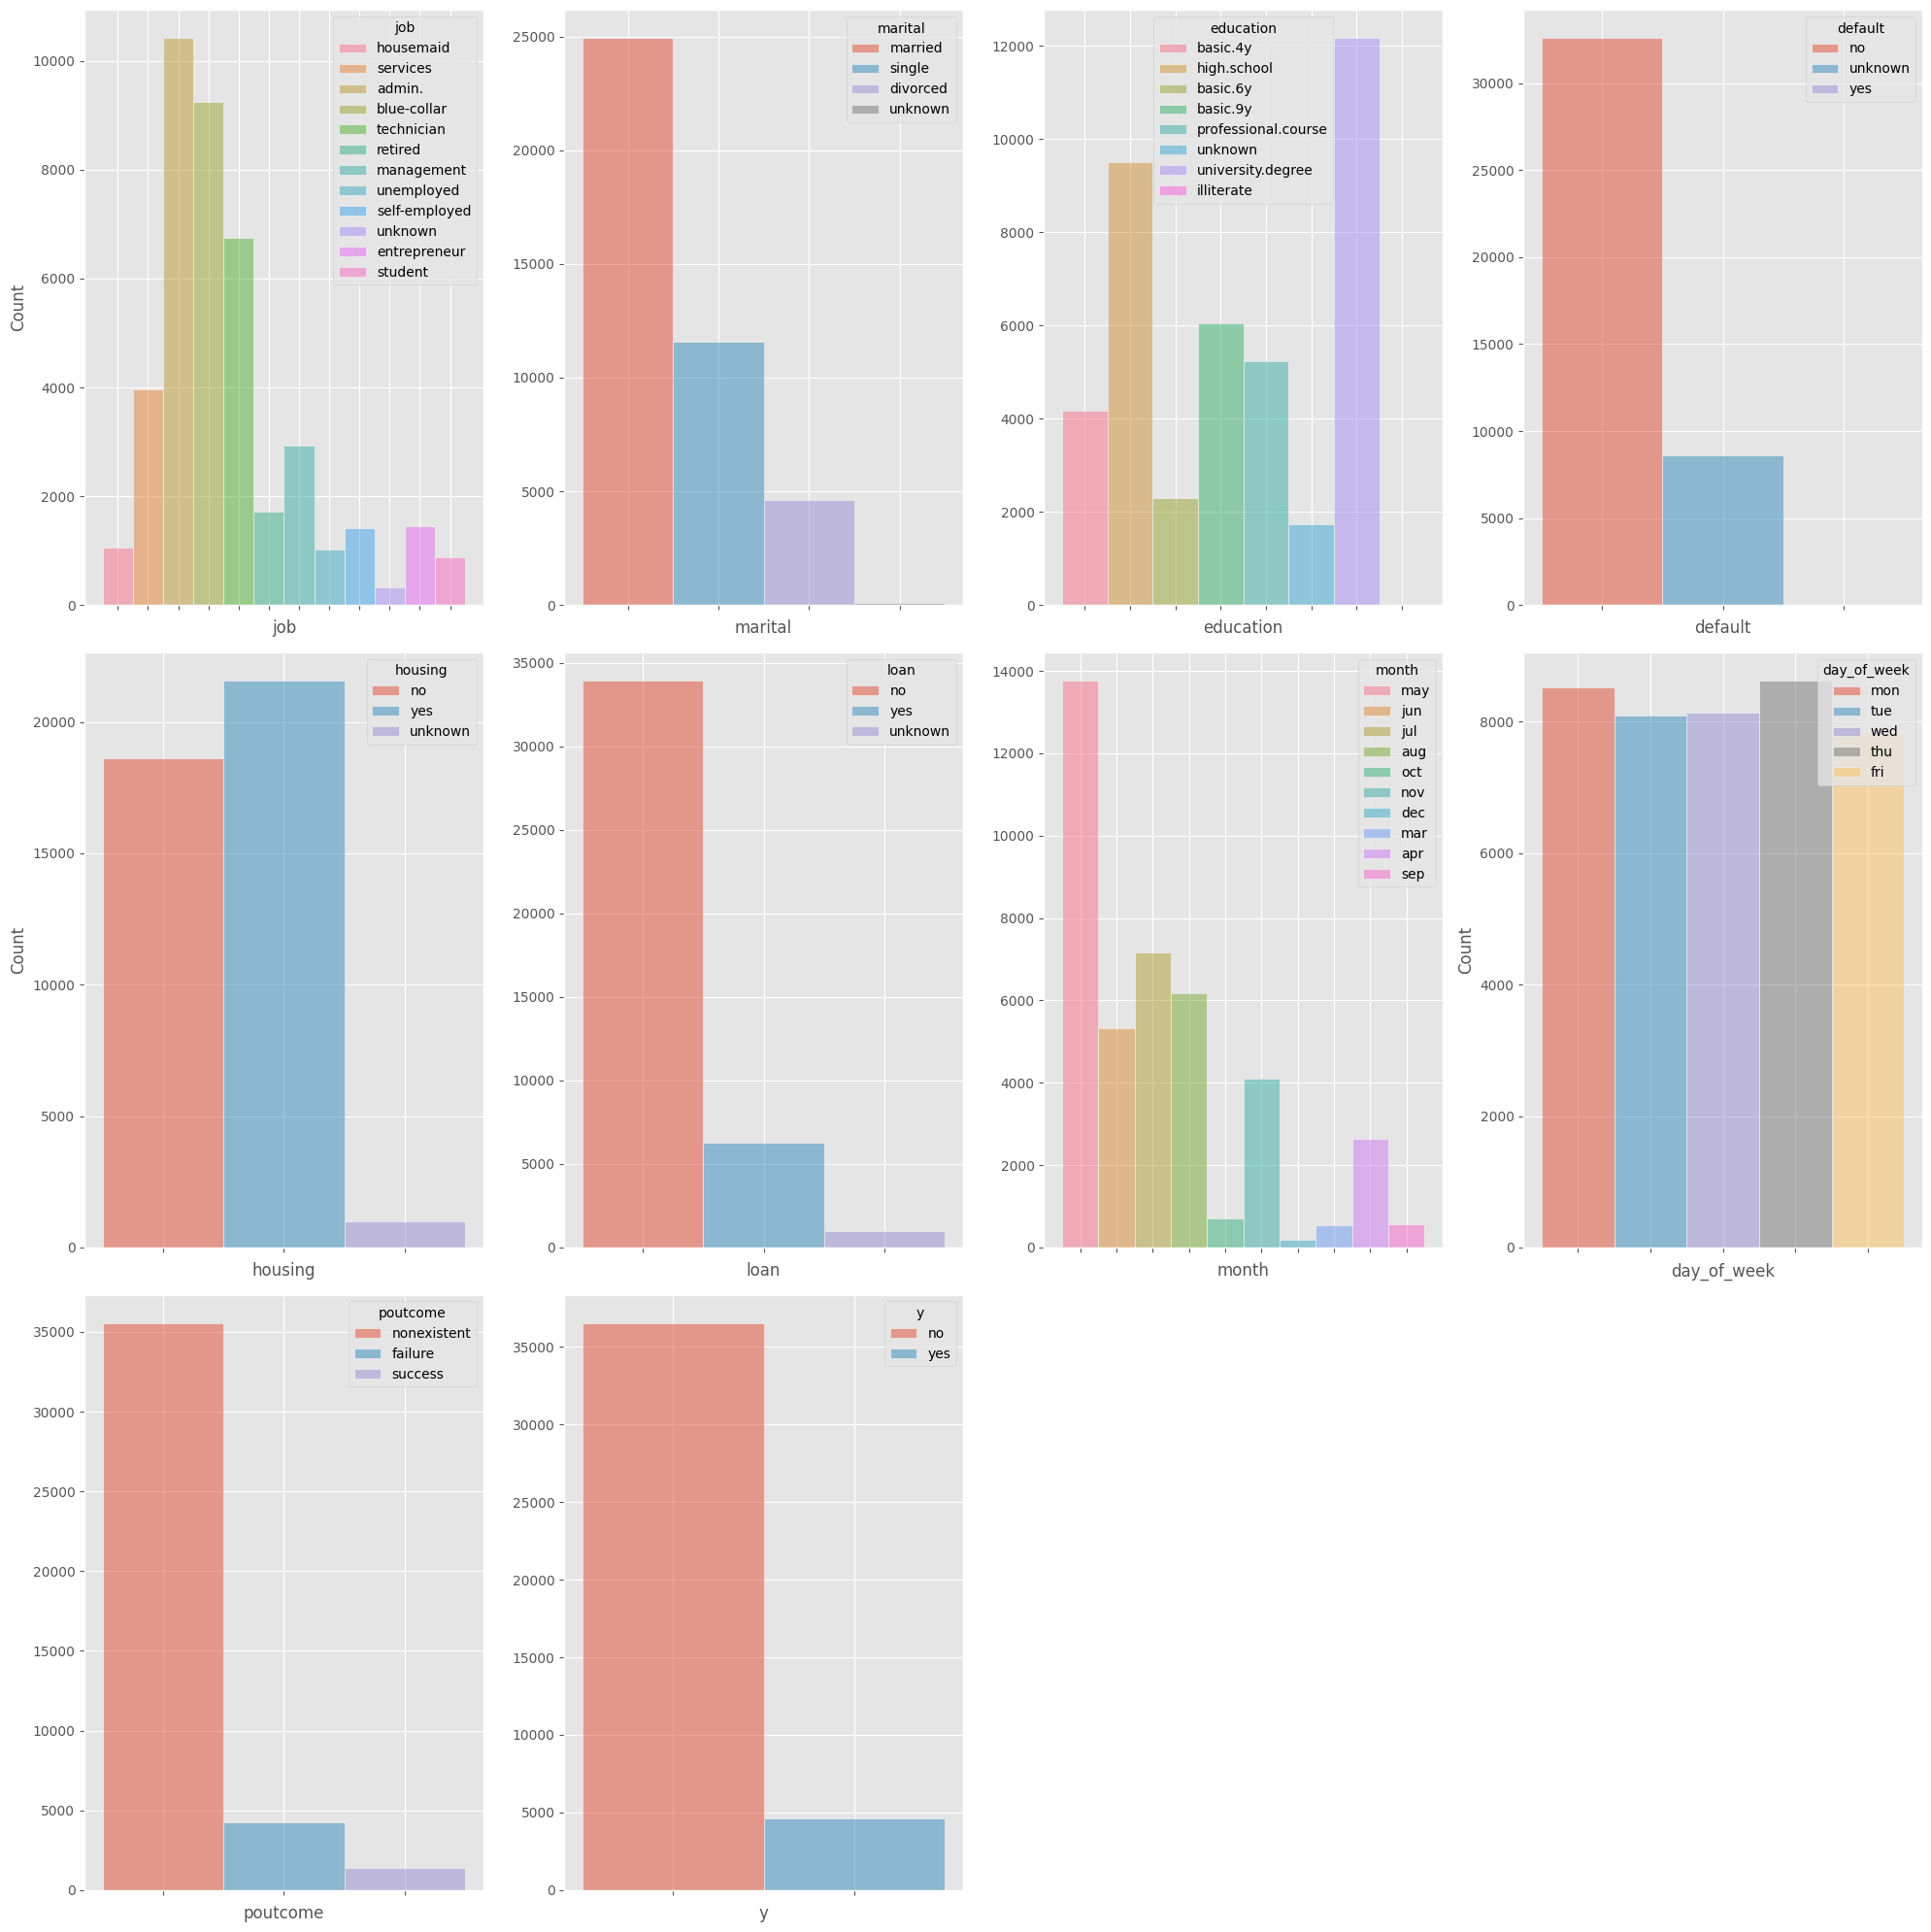

In [129]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

sns.histplot(data=data, x="job", ax=axes[0, 0], hue="job").set(xticklabels=([]))
sns.histplot(data=data, x="marital", ax=axes[0, 1], hue="marital").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="education", ax=axes[0, 2], hue="education").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="default", ax=axes[0, 3], hue="default").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="housing", ax=axes[1, 0], hue="housing").set(xticklabels=([]))
sns.histplot(data=data, x="loan", ax=axes[1, 1], hue="loan").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="month", ax=axes[1, 2], hue="month").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="day_of_week", ax=axes[1, 3], hue="day_of_week").set(xticklabels=([]))
sns.histplot(data=data, x="poutcome", ax=axes[2, 0], hue="poutcome").set(ylabel=None, xticklabels=([]))
sns.histplot(data=data, x="y", ax=axes[2, 1], hue="y").set(ylabel=None, xticklabels=([]))

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

plt.tight_layout()

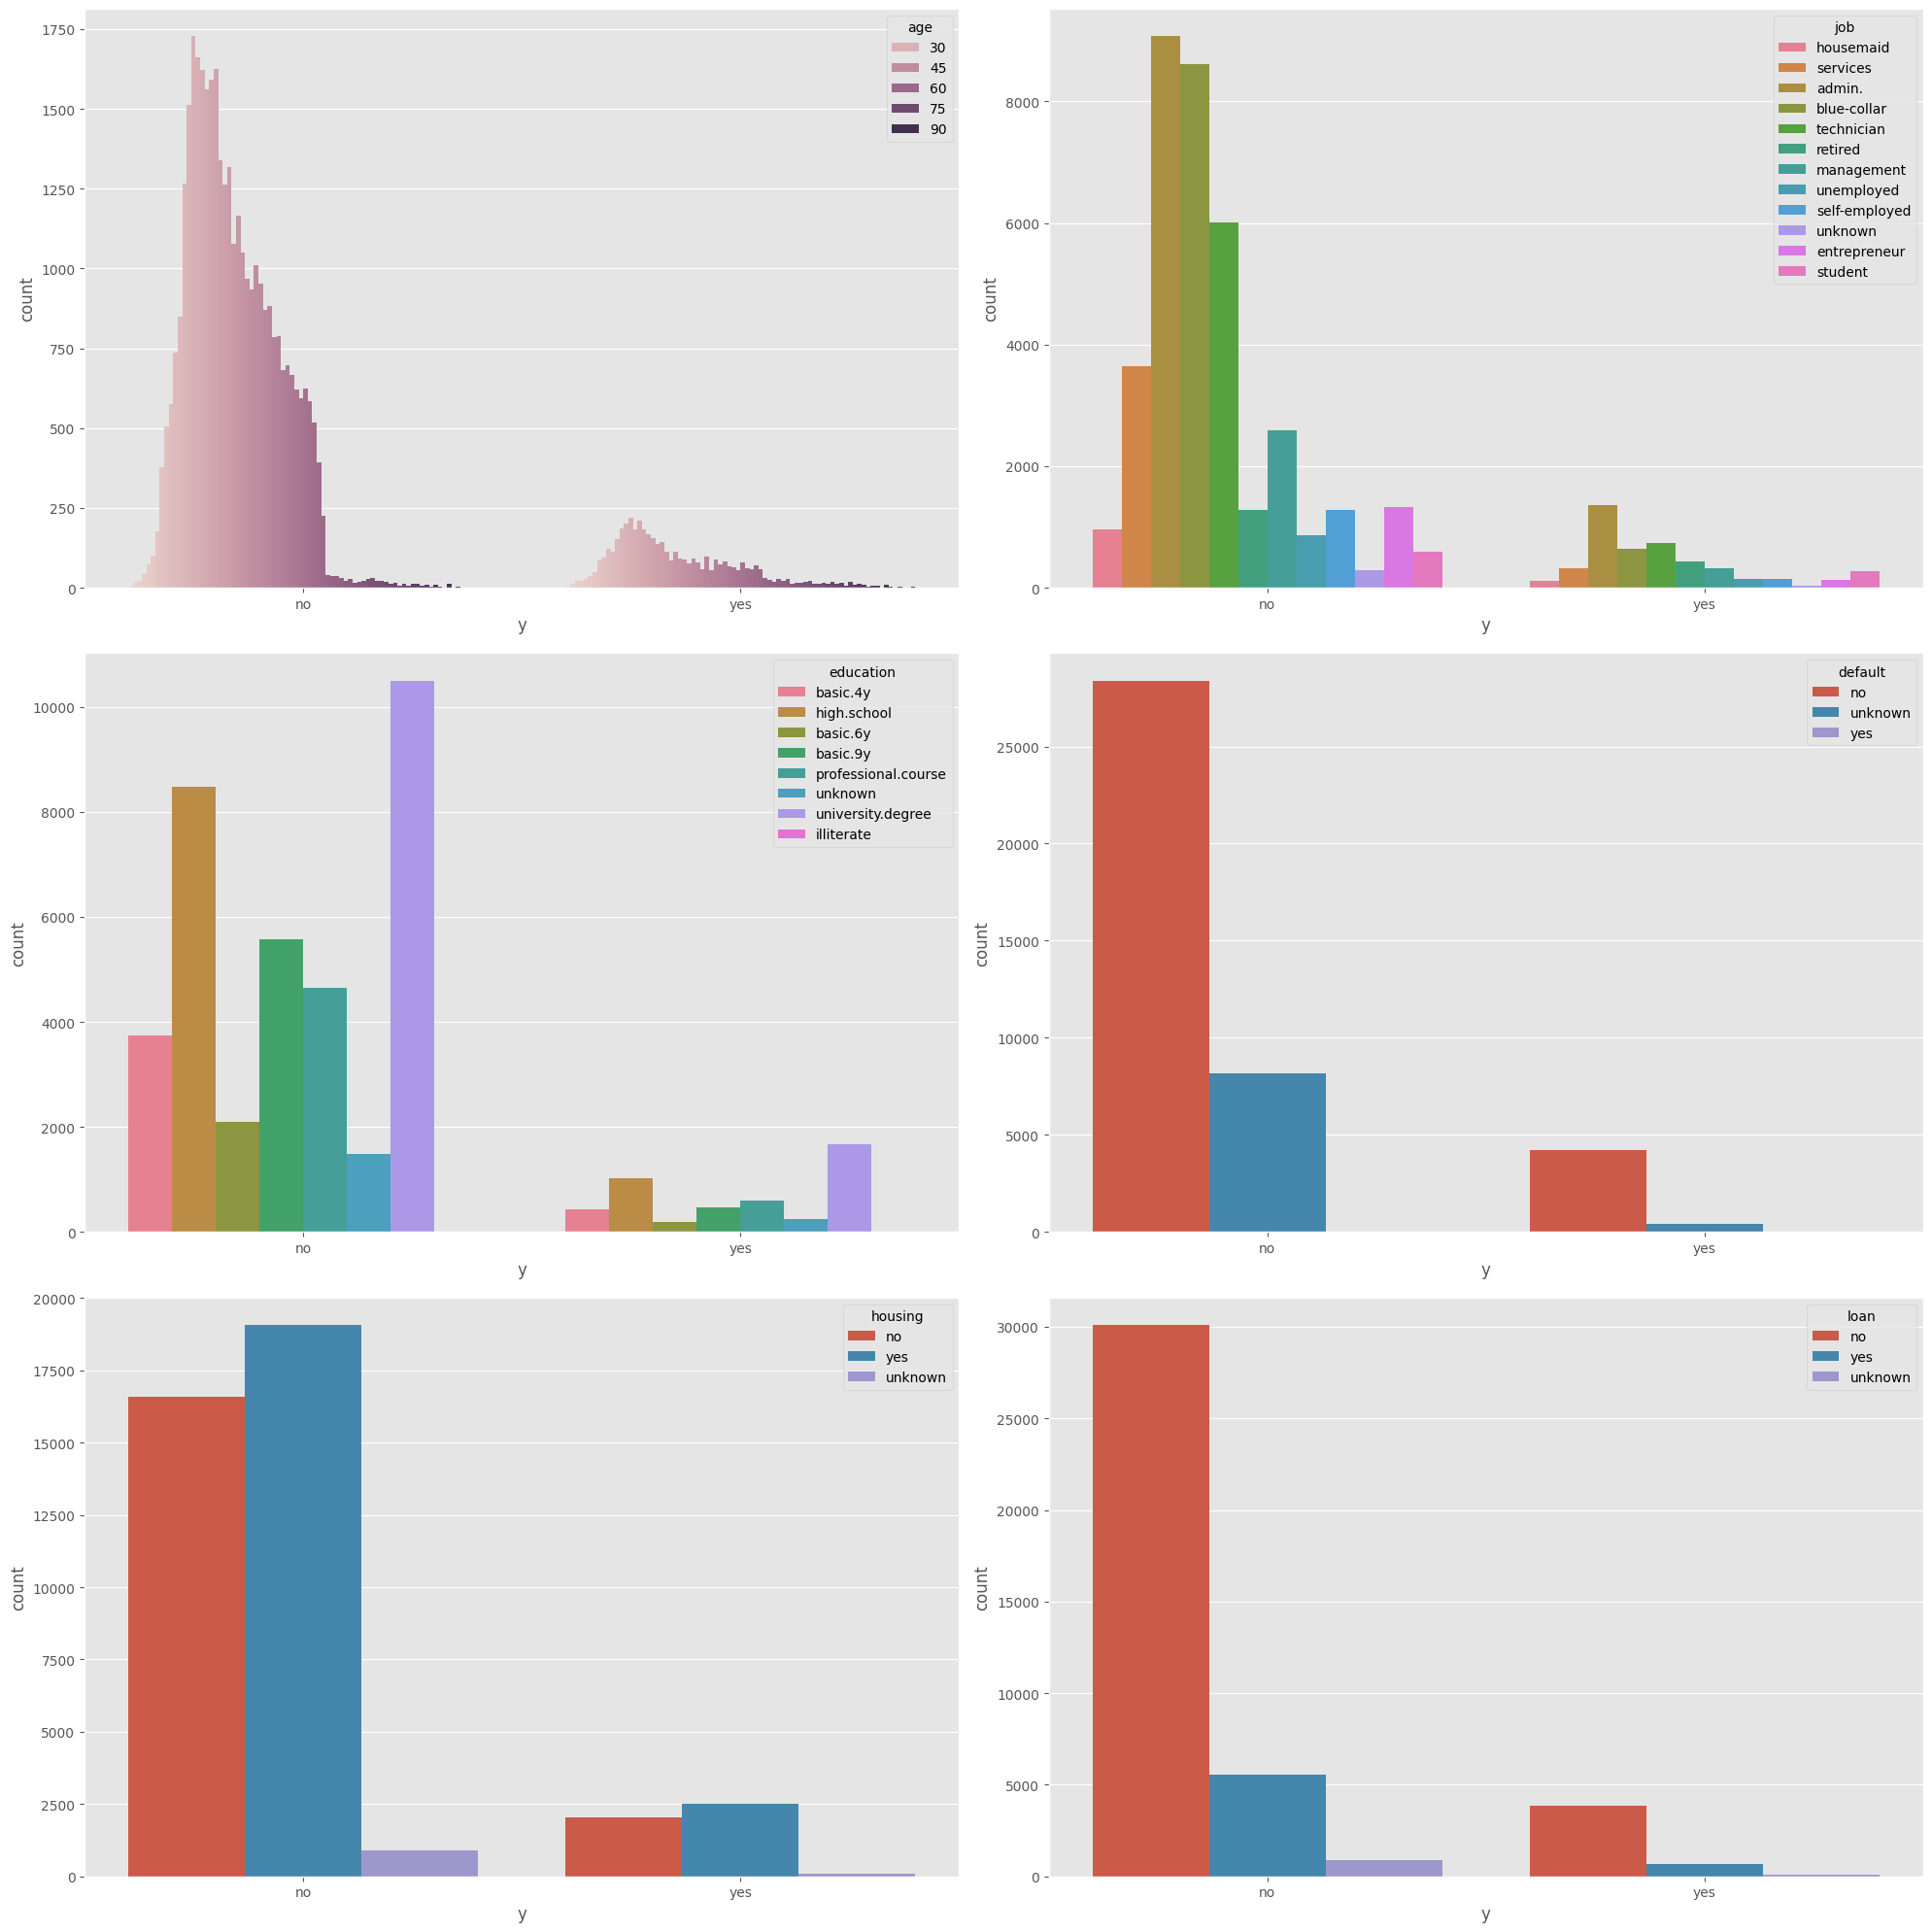

In [130]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.countplot(ax=axes[0,0], data=data, x="y", hue="age")
sns.countplot(ax=axes[0,1], data=data, x="y", hue="job")
sns.countplot(ax=axes[1,0], data=data, x="y", hue="education")
sns.countplot(ax=axes[1,1], data=data, x="y", hue="default")
sns.countplot(ax=axes[2,0], data=data, x="y", hue="housing")
sns.countplot(ax=axes[2,1], data=data, x="y", hue="loan")

plt.tight_layout()
plt.show()

## Correlation Analysis

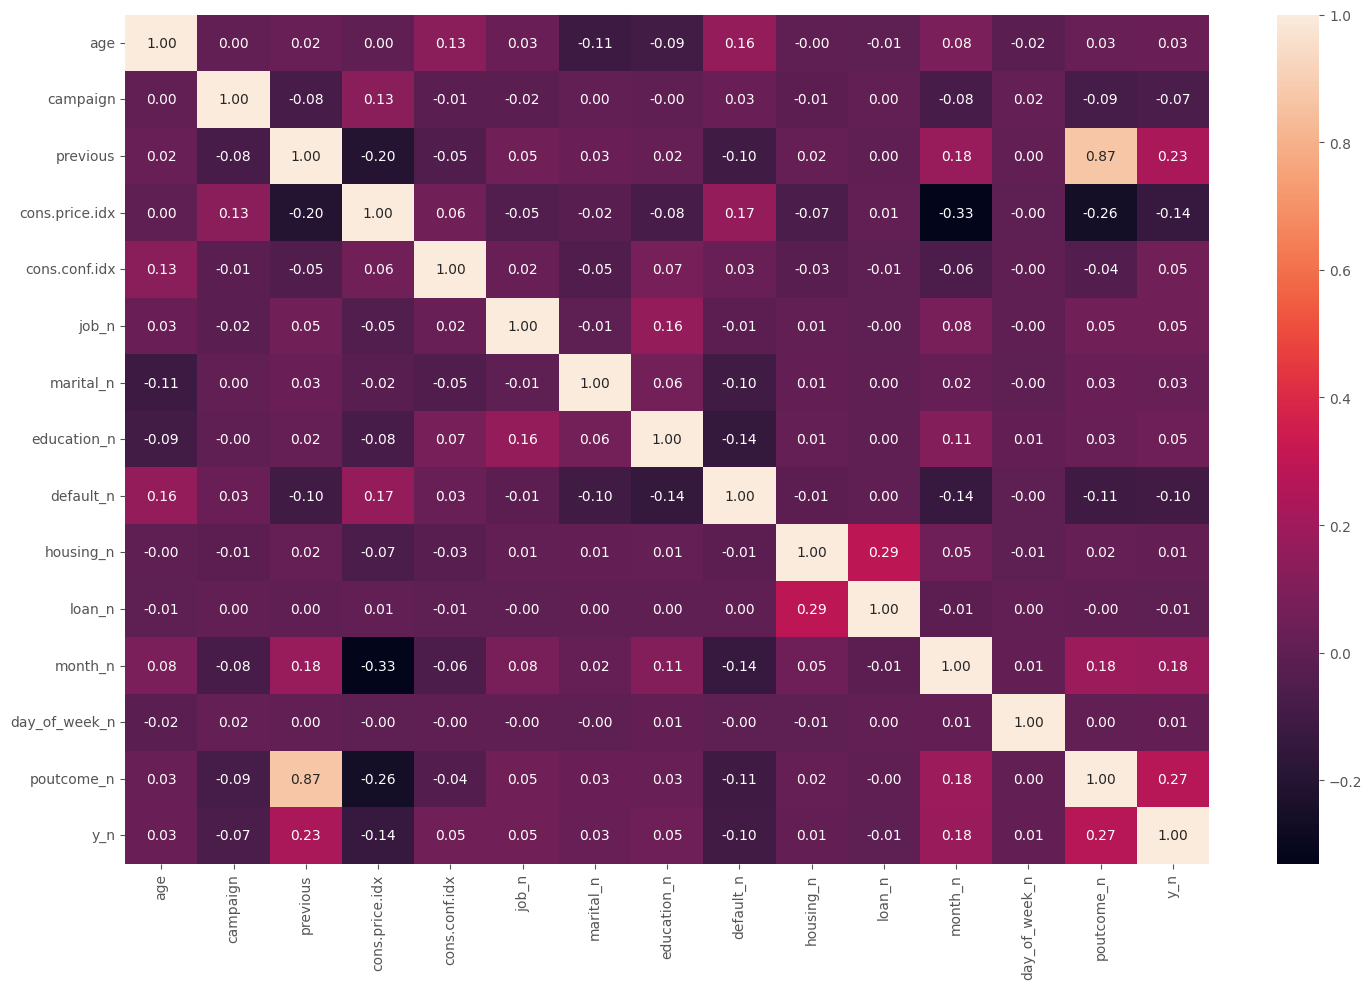

In [131]:
fig, axes = plt.subplots(figsize=(15, 10))

data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["day_of_week_n"] = pd.factorize(data["day_of_week"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]

factorized_data = [
    "age",
    "campaign",
    "previous",
    "cons.price.idx",
    "cons.conf.idx",
    "job_n",
    "marital_n",
    "education_n",
    "default_n",
    "housing_n",
    "loan_n",
    "month_n",
    "day_of_week_n",
    "poutcome_n",
    "y_n",
]

sns.heatmap(
    data[factorized_data].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()
plt.show()

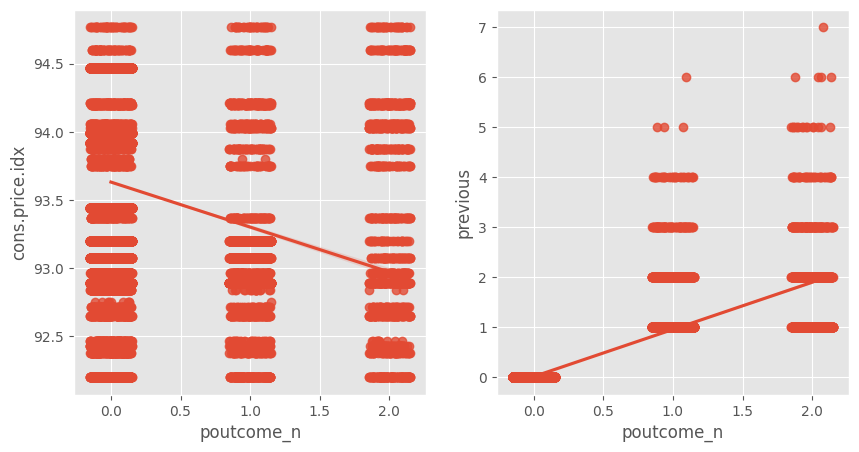

In [132]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(data=data, x="poutcome_n", y="cons.price.idx", ax=axes[0], x_jitter=.15)
sns.regplot(data=data, x="poutcome_n", y="previous", ax=axes[1], x_jitter=.15)

plt.show()

The lower the Price Index, the higher the outcome. Which means that with the deflation, clients got long term deposits, which makes sense.\
It's also possible to see that the higher the number of contacts, more likely the client would make a long term deposit. Probably because of the deflation bankers explained the situation and got more deposits.

[Back to top](#table_of_contents)

# 3. Data Cleaning <a id='data_cleaning'></a>

In [133]:
# Droping 'pdays' as it has more than 39k values equal to 999 days, which corresponds to basically 3 years and will not be very useful in the context
data.drop(['pdays'], axis=1)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,may,mon,149,...,1,0,1,1,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,may,mon,226,...,1,0,1,0,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,...,2,0,2,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,may,mon,307,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,...,5,0,4,0,1,0,5,4,0,1
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,...,3,0,4,0,0,0,5,4,0,0
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,...,5,0,6,0,1,0,5,4,0,0
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,...,4,0,4,0,0,0,5,4,0,1


[Back to top](#table_of_contents)

# 4. Data Preparation <a id='data_preparation'></a>

In [134]:
input_features = [
    "age",
    "campaign",
    "previous",
    "cons.price.idx",
    "cons.conf.idx",
    "job_n",
    "marital_n",
    "education_n",
    "default_n",
    "housing_n",
    "loan_n",
    "month_n",
    "day_of_week_n",
    "poutcome_n",
    "y_n"
]

[Back to top](#table_of_contents)

# 5. Feature Engineering <a id='benchmark_model'></a>

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[input_features])
total_data_scal = pd.DataFrame(scal_features, index = data.index, columns = input_features)
total_data_scal.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,day_of_week_n,poutcome_n,y_n
0,0.481481,0.0,0.0,0.698753,0.60251,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.493827,0.0,0.0,0.698753,0.60251,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.246914,0.0,0.0,0.698753,0.60251,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.698753,0.60251,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,0.698753,0.60251,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0


In [136]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,previous,cons.price.idx,default_n,month_n,poutcome_n
0,0.000000,0.669135,0.5,0.222222,0.0
1,0.000000,0.269680,0.0,0.000000,0.0
2,0.142857,0.269680,0.0,0.000000,0.5
3,0.000000,0.669135,0.0,0.222222,0.0
4,0.000000,0.698753,0.5,0.000000,0.0


In [137]:
X_test_sel.head()

,previous,cons.price.idx,default_n,month_n,poutcome_n
0,0.142857,0.269680,0.0,0.000000,0.5
1,0.000000,0.698753,0.5,0.000000,0.0
2,0.142857,0.269680,0.0,0.000000,0.5
3,0.000000,0.882307,0.0,0.111111,0.0
4,0.000000,0.669135,0.0,0.222222,0.0


In [138]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

[Back to top](#table_of_contents)

# 6. Logistic Regression

In [139]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,previous,cons.price.idx,default_n,month_n,poutcome_n,y_n
0,0.000000,0.669135,0.5,0.222222,0.0,0.0
1,0.000000,0.269680,0.0,0.000000,0.0,0.0
2,0.142857,0.269680,0.0,0.000000,0.5,0.0
3,0.000000,0.669135,0.0,0.222222,0.0,0.0
4,0.000000,0.698753,0.5,0.000000,0.0,0.0


In [140]:
X_train = train_data.drop(["y_n"], axis=1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis=1)
y_test = test_data["y_n"]

In [156]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [157]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [158]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8909929594561787

## Confusion Matrix

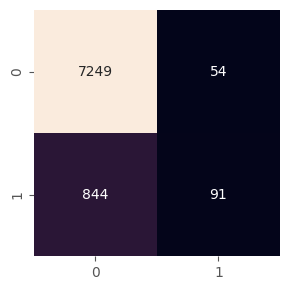

In [159]:
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

## Model Optimization

### Grid Search

In [161]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [149]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
model_grid = LogisticRegression(C=0.1, penalty="l1", solver="liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8909929594561787

### Random Search

In [153]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 50)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=50, scoring='accuracy')

In [154]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 3792.690190732246}


In [155]:
model_random_search = LogisticRegression(solver="liblinear", penalty="l1", C=3792.690190732246)
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8909929594561787

[Back to top](#table_of_contents)